## Boosting

**`Boosting`** es una clase de algoritmos de aprendizaje automático de **"conjunto"** que implica combinar las predicciones de muchos **"aprendices débiles"**. En esta clase de algoritmos los modelos se agregan secuencialmente y los modelos posteriores en la secuencia corrigen las predicciones realizadas por los modelos anteriores en la secuencia.

Un **"aprendiz débil"** es un modelo que es muy simple pero que puede dar buenos resultados.

## AdaBoost (Adaptive Boosting)

**`AdaBoost` es un método de aprendizaje supervisado** que se inventó inicialmente para **aumentar la eficiencia de los clasificadores binarios**. **`AdaBoost`** utiliza un enfoque iterativo para aprender de los errores de los clasificadores débiles y convertirlos en clasificadores fuertes.

El algoritmo **`AdaBoost`** implica el uso de árboles de decisión (**`DecisionTrees`**) muy cortos (de profundidad 1, también son conocidos como **Stumps**) como aprendices débiles que se agregan secuencialmente al conjunto. Cada modelo posterior intenta corregir las predicciones realizadas por el modelo anterior en la secuencia. Esto se logra al examinar el conjunto de datos de entrenamiento para centrarse más en las instancias de entrenamiento en los que los modelos anteriores cometieron errores de predicción.

El algoritmo de entrenamiento implica **comenzar con un árbol de decisión**, encontrar aquellas **instancias en el conjunto de datos de entrenamiento que se clasificaron incorrectamente** y **agregar más peso a esas instancias**. Se entrena otro árbol con los mismos datos, aunque ahora ponderado por los errores de clasificación. Este proceso se repite tantas veces como el usuario quiera.


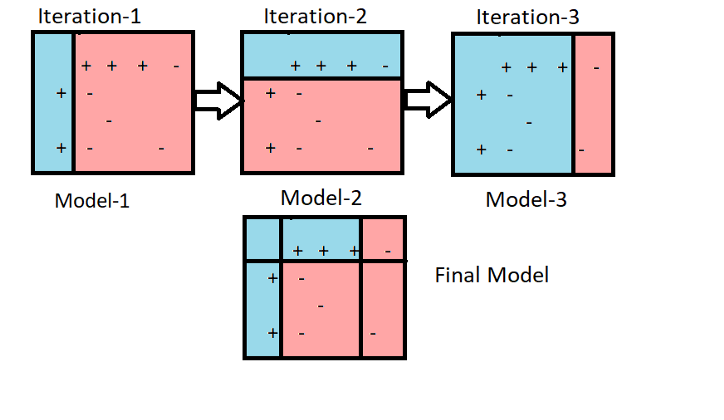

_**Documentación**: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html_

Aunque en la teoria se habla de **`DecisionTrees`**, la función de **`Sklearn`** nos permite usar diferentes modelos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

# Normalizacion
from sklearn.preprocessing import MinMaxScaler

# Train, Test
from sklearn.model_selection import train_test_split

# Metricas
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
iris = datasets.load_iris()
X = iris.data[:100, :2]
y = iris.target[:100]

# En esta ocasión vamos a quedarnos con las primeras 2 clases y solo las primeras 2 columnas

### Procesamiento

In [3]:
# Normalización de datos

x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X)

X

array([[0.2962963 , 0.625     ],
       [0.22222222, 0.41666667],
       [0.14814815, 0.5       ],
       [0.11111111, 0.45833333],
       [0.25925926, 0.66666667],
       [0.40740741, 0.79166667],
       [0.11111111, 0.58333333],
       [0.25925926, 0.58333333],
       [0.03703704, 0.375     ],
       [0.22222222, 0.45833333],
       [0.40740741, 0.70833333],
       [0.18518519, 0.58333333],
       [0.18518519, 0.41666667],
       [0.        , 0.41666667],
       [0.55555556, 0.83333333],
       [0.51851852, 1.        ],
       [0.40740741, 0.79166667],
       [0.2962963 , 0.625     ],
       [0.51851852, 0.75      ],
       [0.2962963 , 0.75      ],
       [0.40740741, 0.58333333],
       [0.2962963 , 0.70833333],
       [0.11111111, 0.66666667],
       [0.2962963 , 0.54166667],
       [0.18518519, 0.58333333],
       [0.25925926, 0.41666667],
       [0.25925926, 0.58333333],
       [0.33333333, 0.625     ],
       [0.33333333, 0.58333333],
       [0.14814815, 0.5       ],
       [0.

### Train, Test

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape},  y_test: {y_test.shape}")

X_train: (70, 2), y_train: (70,)
X_test: (30, 2),  y_test: (30,)


### Modelo

In [6]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

In [14]:
model = AdaBoostClassifier(n_estimators = 50)
model.fit(X_train, y_train)

# Por defecto usa DecisionTreeClassifier()

AdaBoostClassifier()

In [15]:
# AdaBoost usando como base LogisticRegression()

# model = AdaBoostClassifier(base_estimator = LogisticRegression(), n_estimators = 50)
# model.fit(X_train, y_train)

#Por defecto usa DecisionTreeClassifier()

### Predicciones

In [16]:
yhat = model.predict(X_test)

yhat

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1])

In [17]:
print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
print("Accuracy:"     , accuracy_score(y_test, yhat))
print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))

Jaccard Index: 1.0
Accuracy: 1.0
Precisión: 1.0
Sensibilidad: 1.0
F1-score: 1.0


### Confusion Matrix

In [18]:
confusion_matrix(y_test, yhat, labels = [0, 1, 2])

array([[17,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  0]], dtype=int64)

### Atributos y Métodos

In [19]:
# .predict_proba()


np.round(model.predict_proba(X_test), 4)


# Redondeado a 4 decimales para quitar la notación científica

array([[0.0027, 0.9973],
       [0.0343, 0.9657],
       [0.079 , 0.921 ],
       [0.8557, 0.1443],
       [0.9632, 0.0368],
       [0.9261, 0.0739],
       [0.9962, 0.0038],
       [0.0343, 0.9657],
       [0.8691, 0.1309],
       [0.9632, 0.0368],
       [0.8094, 0.1906],
       [0.9585, 0.0415],
       [0.0046, 0.9954],
       [0.8588, 0.1412],
       [0.0343, 0.9657],
       [0.9835, 0.0165],
       [0.0046, 0.9954],
       [0.0215, 0.9785],
       [0.8557, 0.1443],
       [0.7608, 0.2392],
       [0.0403, 0.9597],
       [0.1674, 0.8326],
       [0.9662, 0.0338],
       [0.9901, 0.0099],
       [0.0242, 0.9758],
       [0.8094, 0.1906],
       [0.9835, 0.0165],
       [0.0568, 0.9432],
       [0.9168, 0.0832],
       [0.0027, 0.9973]])

In [20]:
# .base_estimator_ es el modelo base sobre el cual se va adaptando.

model.base_estimator_

DecisionTreeClassifier(max_depth=1)

In [21]:
# .estimators_ lista de modelos generados

model.estimators_

[DecisionTreeClassifier(max_depth=1, random_state=587959093),
 DecisionTreeClassifier(max_depth=1, random_state=611917186),
 DecisionTreeClassifier(max_depth=1, random_state=1879159296),
 DecisionTreeClassifier(max_depth=1, random_state=1832694892),
 DecisionTreeClassifier(max_depth=1, random_state=1039244664),
 DecisionTreeClassifier(max_depth=1, random_state=1667043082),
 DecisionTreeClassifier(max_depth=1, random_state=1233873073),
 DecisionTreeClassifier(max_depth=1, random_state=1641251770),
 DecisionTreeClassifier(max_depth=1, random_state=1911140274),
 DecisionTreeClassifier(max_depth=1, random_state=1467538099),
 DecisionTreeClassifier(max_depth=1, random_state=1725633070),
 DecisionTreeClassifier(max_depth=1, random_state=576393638),
 DecisionTreeClassifier(max_depth=1, random_state=1509517742),
 DecisionTreeClassifier(max_depth=1, random_state=1668528974),
 DecisionTreeClassifier(max_depth=1, random_state=18095929),
 DecisionTreeClassifier(max_depth=1, random_state=66532420),

In [22]:
# .estimator_errors_ retorna el error de los modelos generados

np.round(model.estimator_errors_, 3)

# Redondeado a 3 decimales para quitar la notación científica

array([0.114, 0.103, 0.231, 0.139, 0.184, 0.166, 0.102, 0.01 , 0.01 ,
       0.101, 0.109, 0.112, 0.132, 0.162, 0.2  , 0.207, 0.26 , 0.234,
       0.249, 0.23 , 0.241, 0.241, 0.143, 0.09 , 0.091, 0.112, 0.032,
       0.224, 0.261, 0.18 , 0.184, 0.173, 0.216, 0.216, 0.085, 0.022,
       0.242, 0.287, 0.055, 0.095, 0.016, 0.047, 0.222, 0.267, 0.204,
       0.209, 0.196, 0.202, 0.202, 0.091])

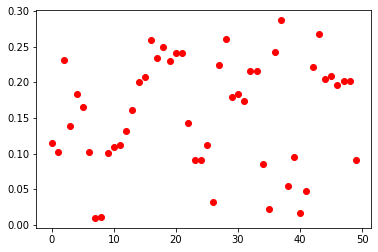

In [23]:
plt.plot(model.estimator_errors_, marker = "o", color = "red", linestyle = "")
plt.show()

In [24]:
# .feature_importances_ retorna la importancia de cada columna

model.feature_importances_

array([0.52, 0.48])

In [25]:
# .decision_function() retorna la "transformación" de una instancia 
# Esta "tranasformacion" es un array de n elementos (uno para cada clase)
# La suma de cada array debe dar 0, o muy cerca de 0
# Es muy parecido a .predict_proba()

# Cuando la clasificación es binaria retorna un unico valor
# Se clasifica la instancia dependiendo de que tan cerca este del 0 o el 1.

model.decision_function(X_test)

array([ 5.91035596,  3.33793798,  2.45655777, -1.77989495, -3.26409208,
       -2.52800283, -5.56572034,  3.33793798, -1.89325087, -3.26409208,
       -1.44622436, -3.14055724,  5.38373555, -1.80558952,  3.33793798,
       -4.08940458,  5.38373555,  3.81722005, -1.77989495, -1.15716163,
        3.17068274,  1.60416724, -3.35331533, -4.60795838,  3.69730314,
       -1.44622436, -4.08940458,  2.80885036, -2.39967527,  5.91035596])

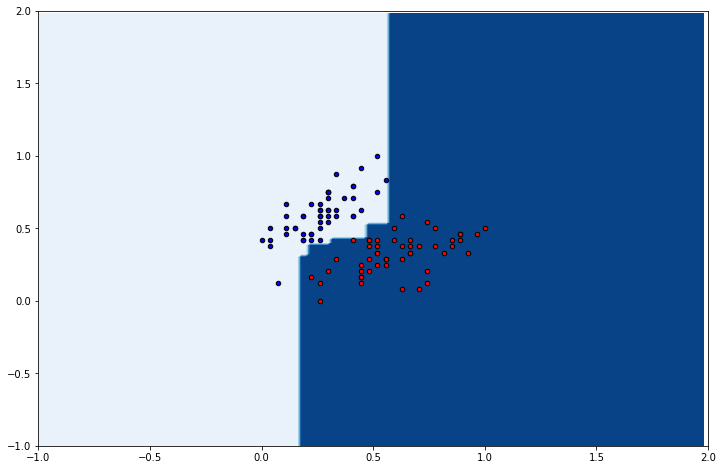

In [26]:
plt.figure(figsize = (12, 8))

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Creación de la Malla
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Calculo de los puntos en Z
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


cs = plt.contourf(xx, yy, Z, cmap = "Blues")
plt.axis("tight")

# Plot de los puntos
for i, n, c in zip(range(2), "AB", "br"):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1],
                c = c, cmap = plt.cm.Paired,
                s = 20, edgecolor = "k",
                label = "Class %s" % n)
    
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.show()

In [ ]:
################################################################################################################################

### Ejercicio 1:
- Utiliza el dataset de **`titanic_preprocesamiento.csv`** para practicar este modelo.
    - Prueba con diferentes modelos de clasificación y diferente número de estimadores.

In [27]:
df = pd.read_csv("../Data/titanic_preprocesamiento.csv")

X = df.drop(["Survived", "Fare-Binning", "Age-Binning"], axis = 1)
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import NearestCentroid
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [29]:
modelos = [LogisticRegression(), KNeighborsClassifier(), RadiusNeighborsClassifier(),
           GaussianNB(), NearestCentroid(), SVC(), DecisionTreeClassifier(), RandomForestClassifier()]

In [30]:
for modelo in modelos:
    
    try:
        model = AdaBoostClassifier(base_estimator = modelo, n_estimators = 50, algorithm = "SAMME")
        model.fit(X_train, y_train)
        
        yhat = model.predict(X_test)
        
        print(modelo)
        print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
        print("Accuracy:"     , accuracy_score(y_test, yhat))
        print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
        print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
        print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))
        print("ROC AUC:"      , roc_auc_score(y_test, yhat))
        
        print("*"*100)
    except:
        continue

LogisticRegression()
Jaccard Index: 0.6506214243440521
Accuracy: 0.7940074906367042
Precisión: 0.785426267281106
Sensibilidad: 0.7894275700934579
F1-score: 0.7871276364427049
ROC AUC: 0.7894275700934579
****************************************************************************************************
GaussianNB()
Jaccard Index: 0.6667470266795243
Accuracy: 0.8052434456928839
Precisión: 0.7970060912538789
Sensibilidad: 0.8018983644859813
F1-score: 0.7990156340474812
ROC AUC: 0.8018983644859814
****************************************************************************************************
SVC()
Jaccard Index: 0.299625468164794
Accuracy: 0.599250936329588
Precisión: 0.299625468164794
Sensibilidad: 0.5
F1-score: 0.37470725995316156
ROC AUC: 0.5
****************************************************************************************************
DecisionTreeClassifier()
Jaccard Index: 0.6706972492312806
Accuracy: 0.8127340823970037
Precisión: 0.8098837209302325
Sensibilidad: 0.7957651

C:\Users\botic\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RandomForestClassifier()
Jaccard Index: 0.6697916666666667
Accuracy: 0.8127340823970037
Precisión: 0.8112717834631071
Sensibilidad: 0.7942172897196261
F1-score: 0.8001497005988024
ROC AUC: 0.7942172897196261
****************************************************************************************************


In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
%%time

model = AdaBoostClassifier()

params = {"n_estimators"   : [i*25 for i in range(1, 20)],
          "base_estimator" : [LogisticRegression(),
                              KNeighborsClassifier(),
                              RadiusNeighborsClassifier(),
                              GaussianNB(),
                              NearestCentroid(),
                              SVC(),
                              DecisionTreeClassifier(),
                              RandomForestClassifier()],
          "algorithm"      : ["SAMME", "SAMME.R"],
          "learning_rate"  : [1/(10**i) for i in range(1, 4)]}

scorers = {"f1_macro", "accuracy", "recall_macro", "roc_auc"}

grid_solver = GridSearchCV(estimator  = model    , 
                           param_grid = params   , 
                           scoring    = scorers  ,
                           cv         = 5        ,
                           refit      = "roc_auc",
                           n_jobs     = -1        )

model_result = grid_solver.fit(X, y)

print(model_result.cv_results_["mean_test_recall_macro"].mean())
print(model_result.cv_results_["mean_test_f1_macro"].mean())
print(model_result.cv_results_["mean_test_accuracy"].mean())
print(model_result.cv_results_["mean_test_roc_auc"].mean())

print("*"*100)

print(model_result.best_score_)
print(model_result.best_params_)

exception calling callback for <Future at 0x1c9abe63850 state=finished raised BrokenProcessPool>
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\botic\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 407, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "C:\Users\botic\anaconda3\lib\multiprocessing\queues.py", line 122, in get
    return _ForkingPickler.loads(res)
MemoryError
"""

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\botic\anaconda3\lib\site-packages\joblib\externals\loky\_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "C:\Users\botic\anaconda3\lib\site-packages\joblib\parallel.py", line 359, in __call__
    self.parallel.dispatch_next()
  File "C:\Users\botic\anaconda3\lib\site-packages\joblib\parallel.py", line 794, in dispatch_next
    if not self.dis

BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.